In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#!pip install xlrd

### Dataset Preparation

#### Loading Data

In [60]:
#read data from given xls ("COVID19 inpatient cases data.xls") (2nd sheet, not first sheet)
xls = pd.ExcelFile(r"C:\\.........\\COVID19 inpatient cases data.xls") #use r before absolute file path
sheetTwo = xls.parse(1) #2 is the sheet number+1 thus if the file has only 1 sheet write 0 in paranthesi

#look the first 5 records of data
df =sheetTwo
sheetTwo.head()

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Clinical outcome,"Hospital stay, days"
0,Male,47,Heavy,15,Y,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,"Aggravated,turn to ICU",NaN
1,Female,53,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,6.0
2,Female,57,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,Improved and discharge,8.0
3,Male,58,Heavy,1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,"Aggravated,transfer to superior hospital",NaN
4,Male,54,Ordinary,10,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,Improved and discharge,5.0


In [3]:
# check column names, not null count and data types 
list(df.columns)

['Gender',
 'Age',
 'Clinical classification',
 'Days from symptoms to hospital',
 'No comorbidity',
 'Cardiovascular and\ncerebrovascular disease',
 'Endocrine system disease',
 'Malignant tumor',
 'Respiratory system disease',
 'Digestive system disease',
 'Renal disease',
 'Liver disease',
 'Fever',
 'Cough',
 'Chest tightness',
 'Fatigue',
 'Diarrhea',
 'Others',
 'Clinical outcome',
 'Hospital stay, days']

In [5]:
df.count() # count specifically counts non-null values

Gender                                         73
Age                                            73
Clinical classification                        73
Days from symptoms to hospital                 73
No comorbidity                                 73
Cardiovascular and\ncerebrovascular disease    73
Endocrine system disease                       73
Malignant tumor                                73
Respiratory system disease                     73
Digestive system disease                       73
Renal disease                                  73
Liver disease                                  73
Fever                                          73
Cough                                          73
Chest tightness                                73
Fatigue                                        73
Diarrhea                                       73
Others                                         73
Clinical outcome                               73
Hospital stay, days                            69


In [6]:
df.dtypes

Gender                                          object
Age                                              int64
Clinical classification                         object
Days from symptoms to hospital                   int64
No comorbidity                                  object
Cardiovascular and\ncerebrovascular disease     object
Endocrine system disease                        object
Malignant tumor                                 object
Respiratory system disease                      object
Digestive system disease                        object
Renal disease                                   object
Liver disease                                   object
Fever                                           object
Cough                                           object
Chest tightness                                 object
Fatigue                                         object
Diarrhea                                        object
Others                                          object
Clinical o

#### Dataset preprocessing 

##### Datasets for FIM and Rule extraction

In [61]:
symptom_cols = ['Fever', 'Cough','Chest tightness', 'Fatigue', 'Diarrhea', 'Others']
# create df_symtoms dataframe including given columns
df_symtoms = pd.DataFrame(df, columns = symptom_cols)
df_symtoms.head();
# add "Covid19" columns assign all entries as "Y"
symtoms = len(df_symtoms) * ["Y"] 
df_symtoms['Covid19'] = symtoms 
  

In [9]:
df_symtoms.tail()

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Covid19
68,Y,Y,N,N,N,N,Y
69,N,Y,N,Y,N,N,Y
70,N,Y,N,N,N,N,Y
71,Y,Y,N,N,N,N,Y
72,Y,N,Y,N,N,N,Y


In [62]:
disease_cols = ['Cardiovascular and\ncerebrovascular disease', 'Endocrine system disease','Malignant tumor','Respiratory system disease', 
                'Digestive system disease','Renal disease','Liver disease']
other_cols= ['Age','Gender']
# create df_diseases dataframe consisting records of given cols(disease_cols and other_cols) from main dataframe
total_cols = disease_cols + other_cols
df_diseases = pd.DataFrame(df, columns = total_cols)
# add also "Clinicial classification" attribute from main dataframe calling  this column as "Illness" in your df_diseases dataframe
clin_class = df["Clinical classification"]
df_diseases.insert( 0, "Illness", clin_class) 
df_diseases.head()

,Illness,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Age,Gender
0,Heavy,N,N,N,N,N,N,N,47,Male
1,Ordinary,N,N,N,N,N,N,N,53,Female
2,Ordinary,N,N,N,N,N,N,N,57,Female
3,Heavy,N,Y,N,N,N,N,N,58,Male
4,Ordinary,N,N,N,N,N,N,N,54,Male


In [63]:
# add " ill" string to all records in "illness" attribute 
df_diseases['Illness'] = "ill"
df_diseases.head()

,Illness,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Age,Gender
0,ill,N,N,N,N,N,N,N,47,Male
1,ill,N,N,N,N,N,N,N,53,Female
2,ill,N,N,N,N,N,N,N,57,Female
3,ill,N,Y,N,N,N,N,N,58,Male
4,ill,N,N,N,N,N,N,N,54,Male


In [64]:
df_diseases['Age Group'] = df_diseases['Age']

In [65]:
# categorize ages as "Elderly" (Age>=65), 
#                        "Adults" (18<= Age <65),
#                        "Teens" (12=<Age<18),
#                        "Children" (1<Age<11), 
#                        "Infants" (Age<=1)
# in new column "Age Group", drop "Age" column in df_disease dataframe.
df_diseases.loc[df['Age'] >=65, 'Age Group'] = "Elderly"
df_diseases.loc[((18<= df['Age']) & ( df['Age'] < 65)), 'Age Group'] = "Adults"
df_diseases.loc[((12<= df['Age']) & ( df['Age'] < 18)), 'Age Group'] = "Teens"
df_diseases.loc[((1<= df['Age']) & ( df['Age'] < 11)), 'Age Group'] = "Children"
df_diseases.loc[df['Age'] <=1 , 'Age'] = "Infants"

In [66]:
df_diseases = df_diseases.drop({'Age'}, axis=1) 

In [67]:
df_diseases.head()

,Illness,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Gender,Age Group
0,ill,N,N,N,N,N,N,N,Male,Adults
1,ill,N,N,N,N,N,N,N,Female,Adults
2,ill,N,N,N,N,N,N,N,Female,Adults
3,ill,N,Y,N,N,N,N,N,Male,Adults
4,ill,N,N,N,N,N,N,N,Male,Adults


In [68]:
# Convert "Gender", "Illness", "Age Group" attributes to dummies for one-hot encoding, \
#  then drop these attributes from df_diseases
df_diseases = pd.get_dummies(df_diseases,columns = ["Gender", "Illness", "Age Group"],prefix = ["Gender", "Illness", "Age Group"])

In [69]:
df_diseases.head()

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Gender_Female,Gender_Male,Illness_ill,Age Group_Adults,Age Group_Elderly
0,N,N,N,N,N,N,N,0,1,1,1,0
1,N,N,N,N,N,N,N,1,0,1,1,0
2,N,N,N,N,N,N,N,1,0,1,1,0
3,N,Y,N,N,N,N,N,0,1,1,1,0
4,N,N,N,N,N,N,N,0,1,1,1,0


In [70]:
df_diseases = df_diseases.drop({'Gender_Male','Age Group_Elderly'}, axis=1) 
df_diseases.head()
#'Gender_Male' and 'Age Group_Elderly' there are two different choice for gender and Age Group features. When one hot encoding applied the two formed columns will mean the same thing
# so i droped one column from each of them columns. It would be a dummy variable trap if it hadn't been done.

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Gender_Female,Illness_ill,Age Group_Adults
0,N,N,N,N,N,N,N,0,1,1
1,N,N,N,N,N,N,N,1,1,1
2,N,N,N,N,N,N,N,1,1,1
3,N,Y,N,N,N,N,N,0,1,1
4,N,N,N,N,N,N,N,0,1,1


In [71]:
# convert all data to bool (True or False) (by replacing or mapping attribute values ) for df_symptoms dataframe
for col in df_symtoms:
    df_symtoms[col].replace("Y", 1, inplace=True)
    df_symtoms[col].replace("N", 0, inplace=True)

In [72]:
df_symtoms.head()

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Covid19
0,1,1,1,1,1,0,1
1,1,1,1,0,0,0,1
2,1,1,0,0,0,0,1
3,0,0,0,0,0,0,1
4,1,1,1,0,0,0,1


In [73]:
# same for df_diseases dataframe
df_dis = ['Cardiovascular and\ncerebrovascular disease',
       'Endocrine system disease', 'Malignant tumor',
       'Respiratory system disease', 'Digestive system disease',
       'Renal disease', 'Liver disease']

In [74]:
for col in df_dis:
    df_diseases[col].replace("Y", 1, inplace=True)
    df_diseases[col].replace("N", 0, inplace=True)

In [75]:
df_diseases.head()

,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Gender_Female,Illness_ill,Age Group_Adults
0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,1,1,1
3,0,1,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,1,1


In [23]:
# install mlxtend library (suggested version is 0.15.0.0)
!pip install mlxtend


In [76]:
# create "df_symptoms_extended" concatanating df_symptoms with df_diseases dummy attributes of "Gender", "Illness", "Age Group" and their records.
symptoms = df_diseases.iloc[:,7:]
df_symptoms_extended = pd.concat([df_symtoms,symptoms],axis=1)
df_symptoms_extended.head()
# drop "Covid19" attribute in extended dataframe
df_symptoms_extended = df_symptoms_extended.drop({'Covid19'}, axis=1) 
df_symptoms_extended.head()

,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,Gender_Female,Illness_ill,Age Group_Adults
0,1,1,1,1,1,0,0,1,1
1,1,1,1,0,0,0,1,1,1
2,1,1,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,1,1
4,1,1,1,0,0,0,0,1,1


#### Fill mising values with KNN

!pip install ycimputeThe usage of KNNImputer is not allowed.

In [25]:
!pip install ycimpute

In [84]:
#from ycimpute.imputer import knnimput
# show missing record as (number of missings/total) (should be only "Hospital stay, days") 
summ = 0
i = 0
while i<df.shape[1] :
    summ = summ + df.iloc[:,i].isnull().sum()
    i += 1
summ

4

In [78]:
missing_rate = summ / df.shape[0]
missing_rate

0.0547945205479452

In [96]:
# copy dataframe df1 to df2 
df1 = df.copy()
df1 = df1.drop(columns =["Clinical outcome"])
df2 = df1.copy() 


In [86]:
df2.head()

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,"Hospital stay, days"
0,Male,47,Heavy,15,Y,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,NaN
1,Female,53,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,6.0
2,Female,57,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,8.0
3,Male,58,Heavy,1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,NaN
4,Male,54,Ordinary,10,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,5.0


In [97]:
i = 4
# convert bools and strings to numeric attributes ('Male':1, 'Female':2, 'Heavy':1, 'Ordinary':2, 'Y':1, 'N':0)
while i<18: 
    df2.iloc[:,i] = df2.iloc[:,i].astype('category').cat.codes 
    i += 1

#.cat.codes  1 -0
# fit_transform 0 - 1

In [98]:

df2["Gender"]=np.where(df2["Gender"].str.contains("Female"),2,1) 
df2["Clinical classification"]=np.where(df2["Clinical classification"].str.contains("Ordinary"),2,1) 

In [89]:
df2.head()

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,"Hospital stay, days"
0,1,47,1,15,1,0,0,0,0,0,0,0,1,1,1,1,1,0,NaN
1,2,53,2,13,1,0,0,0,0,0,0,0,1,1,1,0,0,0,6.0
2,2,57,2,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,8.0
3,1,58,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN
4,1,54,2,10,1,0,0,0,0,0,0,0,1,1,1,0,0,0,5.0


In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def min_max_scale(): 
    null_index = df2['Hospital stay, days'].isnull()
    scale = scaler.fit_transform(df2.loc[~null_index, ['Hospital stay, days']])
    return scale 

def inv_min_max_scale():
   
    scale = scaler.inverse_transform(np.array(df2['Hospital stay, days']).reshape(-1, 1))
    return scale

In [100]:
df2 = df2.astype(float)
# min_max_scale for scaling missing atttribute (you will need for "nan" values)
null_index = df2['Hospital stay, days'].isnull()

#df2.loc[~null_index, ['Hospital stay, days']] = min_max_scale(df2)
nan_scale = min_max_scale()
df2.loc[~null_index, ['Hospital stay, days']] = nan_scale

# scale other nonmissing attributes using MinMaxScaler in sklearn
sc = MinMaxScaler()
scale = sc.fit_transform(df2.iloc[:,:18])
df2.iloc[:,:18] = scale

# fill missing values based on KNeighborsRegressor regression in sklearn (for k=7)
from ycimpute.imputer import knnimput
var_names = list(df2)
n_df = np.array(df2)
dff = knnimput.KNN(k = 7).complete(n_df)
df2 = pd.DataFrame(dff, columns = var_names)

# don't forget to convert original range
df2['Hospital stay, days'] = inv_min_max_scale()
df2.iloc[:,:18] =sc.inverse_transform(df2.iloc[:,:18])
df2 = df2.astype(int)
# fill df1 missings with given values
df1["Hospital stay, days"] = df2["Hospital stay, days"]

Imputing row 1/73 with 1 missing, elapsed time: 0.004


In [101]:
df2.head()

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,"Hospital stay, days"
0,1,47,1,15,1,0,0,0,0,0,0,0,1,1,1,1,1,0,14
1,2,53,2,13,1,0,0,0,0,0,0,0,1,1,1,0,0,0,6
2,2,56,2,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,8
3,1,57,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,17
4,1,53,2,10,1,0,0,0,0,0,0,0,1,1,1,0,0,0,5


In [102]:
df1.head()

,Gender,Age,Clinical classification,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,"Hospital stay, days"
0,Male,47,Heavy,15,Y,N,N,N,N,N,N,N,Y,Y,Y,Y,Y,N,14
1,Female,53,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,6
2,Female,57,Ordinary,13,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,N,8
3,Male,58,Heavy,1,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,17
4,Male,54,Ordinary,10,Y,N,N,N,N,N,N,N,Y,Y,Y,N,N,N,5


#### Dataset for classification task

In [135]:
# copy df1 to data_df datafarme
data_df = df1.copy()
# split data: label attribute 'Clinical classification' as Y, features as X (including nonmissing features)
data_df["Clinical classification"]=np.where(data_df["Clinical classification"].str.contains("Ordinary"),1,0) 

Y = data_df["Clinical classification"]
X = data_df.drop({'Clinical classification'}, axis=1) 

# convert attribute values to 0 and 1 ('Y':1, 'N':0, 'Male':0, "Female":1)
i = 3
while i<17: 
    X.iloc[:,i] = X.iloc[:,i].astype('category').cat.codes 
    i += 1
    
X["Gender"]=np.where(X["Gender"].str.contains("Female"),1,0) 
    


In [137]:
X.head()

,Gender,Age,Days from symptoms to hospital,No comorbidity,Cardiovascular and\ncerebrovascular disease,Endocrine system disease,Malignant tumor,Respiratory system disease,Digestive system disease,Renal disease,Liver disease,Fever,Cough,Chest tightness,Fatigue,Diarrhea,Others,"Hospital stay, days"
0,0,47,15,1,0,0,0,0,0,0,0,1,1,1,1,1,0,14
1,1,53,13,1,0,0,0,0,0,0,0,1,1,1,0,0,0,6
2,1,57,13,1,0,0,0,0,0,0,0,1,1,0,0,0,0,8
3,0,58,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,17
4,0,54,10,1,0,0,0,0,0,0,0,1,1,1,0,0,0,5


In [139]:
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: Clinical classification, dtype: int32

In [140]:
from sklearn.model_selection import train_test_split
# Split dataset as train and test set using sklearn (for random_state=44) 
# x_train, x_val, y_test, y_test = # to-do
i  = train_test_split(X, Y, test_size=0.30, random_state=44)

### Apriori Part: Frequent Itemset Mining, Association Rule Extraction 

In [108]:
from mlxtend.frequent_patterns import apriori,association_rules

In [109]:
# find itemsets for df_symptoms data with min support=0.02 
# df_ap = # to-do
df_ap = apriori(df_symtoms, min_support = 0.02, use_colnames = True)

In [110]:
# find itemsets for df_symptoms_extended data with min support=0.02 
# df_ap_extended = # to-do
df_ap_extended = apriori(df_symptoms_extended, min_support = 0.02, use_colnames = True)

In [111]:
# find itemsets for df_diseases data with min support=0.02 
# df_ap_diseases = # to-do
df_ap_diseases = apriori(df_diseases, min_support = 0.02, use_colnames = True)

In [112]:
# use mlxtend for generating association rules from symptoms itemset  (with min confidence =0.6)
rules = association_rules(df_ap, metric="confidence", min_threshold=0.6)

# show rules with min support= 0.2
# rules0 = #to-do
rules0 = rules[rules['support'] > 0.2]

In [113]:
rules0.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fever),(Cough),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
1,(Cough),(Fever),0.753425,0.753425,0.589041,0.781818,1.037686,0.021392,1.130137
2,(Chest tightness),(Fever),0.287671,0.753425,0.260274,0.904762,1.200866,0.043535,2.589041
6,(Fever),(Covid19),0.753425,1.000000,0.753425,1.000000,1.000000,0.000000,inf
7,(Covid19),(Fever),1.000000,0.753425,0.753425,0.753425,1.000000,0.000000,1.000000


In [114]:
# use mlxtend for generating association rules from disease itemset  (with min confidence =0.6)
rules = association_rules(df_ap_diseases, metric="confidence", min_threshold=0.6)
# show rules with min support= 0.1
# rules2 = # to-do
rules2 = rules[rules['support'] > 0.1]

In [115]:
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cardiovascular and\ncerebrovascular disease),(Illness_ill),0.273973,1.000000,0.273973,1.000000,1.00000,0.000000,inf
1,(Endocrine system disease),(Illness_ill),0.136986,1.000000,0.136986,1.000000,1.00000,0.000000,inf
4,(Gender_Female),(Illness_ill),0.493151,1.000000,0.493151,1.000000,1.00000,0.000000,inf
5,(Gender_Female),(Age Group_Adults),0.493151,0.671233,0.342466,0.694444,1.03458,0.011447,1.075965
6,(Age Group_Adults),(Illness_ill),0.671233,1.000000,0.671233,1.000000,1.00000,0.000000,inf


In [116]:
# use mlxtend for generating association rules from extended symptoms itemset  (with min confidence =0.6)
rules = association_rules(df_ap_extended, metric="confidence", min_threshold=0.6)

# show rules with min support= 0.2
# rules1 = # to-do
rules1 = rules[rules['support'] > 0.2]

In [117]:
#find rules such as (...)-> (Covid19)    (min confidence= 0.6, min support = 0.2)
# from rules0

rules0[(rules0['consequents'] == {'Covid19'}) & (rules0['confidence'] >= 0.6) & (rules0['support'] >= 0.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Fever),(Covid19),0.753425,1.0,0.753425,1.0,1.0,0.0,inf
12,(Cough),(Covid19),0.753425,1.0,0.753425,1.0,1.0,0.0,inf
14,(Chest tightness),(Covid19),0.287671,1.0,0.287671,1.0,1.0,0.0,inf
27,"(Fever, Cough)",(Covid19),0.589041,1.0,0.589041,1.0,1.0,0.0,inf
33,"(Fever, Chest tightness)",(Covid19),0.260274,1.0,0.260274,1.0,1.0,0.0,inf
50,"(Cough, Chest tightness)",(Covid19),0.246575,1.0,0.246575,1.0,1.0,0.0,inf
72,"(Fever, Cough, Chest tightness)",(Covid19),0.219178,1.0,0.219178,1.0,1.0,0.0,inf


In [118]:
# find rules such as (item1, item2)->(..) (length of antecedents is at least 2)(min confidence= 0.6, min support = 0.1)
# from rules1 and rules2
rules1 = rules1.reset_index(drop=True)
rules1.head()
rules1['length'] = [0]* len(rules1)
for i in range(0, len(rules1['antecedents'])):
    rules1['length'][i] = len(rules1['antecedents'][i])
        
rules2 = rules2.reset_index(drop=True)
rules2.head()
rules2['length'] = [0]* len(rules2)
for i in range(0, len(rules2['antecedents'])):
    rules2['length'][i] = len(rules2['antecedents'][i])        



<ipython-input-118-931e17d4400b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules1['length'][i] = len(rules1['antecedents'][i])
<ipython-input-118-931e17d4400b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules2['length'][i] = len(rules2['antecedents'][i])


In [119]:
# rules1
rules1[(rules1['length'] >= 2) & (rules1['confidence'] >= 0.6) & (rules1['support'] >= 0.1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
19,"(Fever, Chest tightness)",(Cough),0.260274,0.753425,0.219178,0.842105,1.117703,0.023081,1.561644,2
20,"(Cough, Chest tightness)",(Fever),0.246575,0.753425,0.219178,0.888889,1.179798,0.033402,2.219178,2
22,"(Fever, Gender_Female)",(Cough),0.424658,0.753425,0.328767,0.774194,1.027566,0.008820,1.091977,2
23,"(Cough, Gender_Female)",(Fever),0.383562,0.753425,0.328767,0.857143,1.137662,0.039782,1.726027,2
25,"(Fever, Cough)",(Illness_ill),0.589041,1.000000,0.589041,1.000000,1.000000,0.000000,inf,2
...,...,...,...,...,...,...,...,...,...,...
116,"(Illness_ill, Age Group_Adults, Gender_Female)","(Fever, Cough)",0.342466,0.589041,0.246575,0.720000,1.222326,0.044849,1.467710,3
117,"(Fever, Cough, Gender_Female)","(Age Group_Adults, Illness_ill)",0.328767,0.671233,0.246575,0.750000,1.117347,0.025896,1.315068,3
118,"(Cough, Gender_Female, Illness_ill)","(Fever, Age Group_Adults)",0.383562,0.506849,0.246575,0.642857,1.268340,0.052167,1.380822,3
119,"(Age Group_Adults, Gender_Female)","(Fever, Cough, Illness_ill)",0.342466,0.589041,0.246575,0.720000,1.222326,0.044849,1.467710,2


In [120]:
# rules2
rules2[(rules2['length'] >= 2) & (rules2['confidence'] >= 0.6) & (rules2['support'] >= 0.1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
6,"(Cardiovascular and\ncerebrovascular disease, ...",(Illness_ill),0.136986,1.000000,0.136986,1.000000,1.00000,0.000000,inf,2
7,"(Cardiovascular and\ncerebrovascular disease, ...",(Illness_ill),0.136986,1.000000,0.136986,1.000000,1.00000,0.000000,inf,2
8,"(Gender_Female, Age Group_Adults)",(Illness_ill),0.342466,1.000000,0.342466,1.000000,1.00000,0.000000,inf,2
9,"(Gender_Female, Illness_ill)",(Age Group_Adults),0.493151,0.671233,0.342466,0.694444,1.03458,0.011447,1.075965,2


### Classification Part: Predicting Clinical Cases

#### Bayes Classifier

In [141]:
# Create a Multinomial Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Train the model using the training set
gnb.fit(X_train, y_train)
# Predict test set labels based on your model
y_predB = gnb.predict(X_test)
#calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure (write these functions yourself (no additional libs))
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predB)

from sklearn.metrics import classification_report

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

f1=2*((precision*recall)/(precision+recall))
print('f1 : {0:0.4f}'.format(f1))


Classification accuracy : 0.5909
Classification error : 0.4091
Precision : 0.8750
Recall or Sensitivity : 0.4667
Specificity : 0.8571
f1 : 0.6087


#### Decision Tree Classifier

In [142]:
# create ID3 Tree using sklearn
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy')

# train Decision Tree Classifier
model = model.fit(X_train, y_train)
# Predict classes for test data
predictions=model.predict(X_test)

# calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure, confusion matrix 
#           based on your defined functions
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

from sklearn.metrics import classification_report

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

f1=2*((precision*recall)/(precision+recall))
print('f1 : {0:0.4f}'.format(f1))

Classification accuracy : 0.7273
Classification error : 0.2727
Precision : 0.5000
Recall or Sensitivity : 0.6667
Specificity : 0.7500
f1 : 0.5714


[Text(600.625, 1009.5428571428572, 'X[1] <= 56.5\nentropy = 0.897\nsamples = 51\nvalue = [16, 35]'),
 Text(232.5, 854.2285714285715, 'X[2] <= 9.5\nentropy = 0.414\nsamples = 24\nvalue = [2, 22]'),
 Text(155.0, 698.9142857142858, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(310.0, 698.9142857142858, 'X[14] <= 0.5\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(232.5, 543.6, 'X[2] <= 11.5\nentropy = 0.503\nsamples = 9\nvalue = [1, 8]'),
 Text(155.0, 388.28571428571433, 'X[17] <= 10.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(77.5, 232.97142857142865, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(232.5, 232.97142857142865, 'X[1] <= 53.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(155.0, 77.65714285714284, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(310.0, 77.65714285714284, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(310.0, 388.28571428571433, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(387.5, 543.6, 'entropy = 0.0\

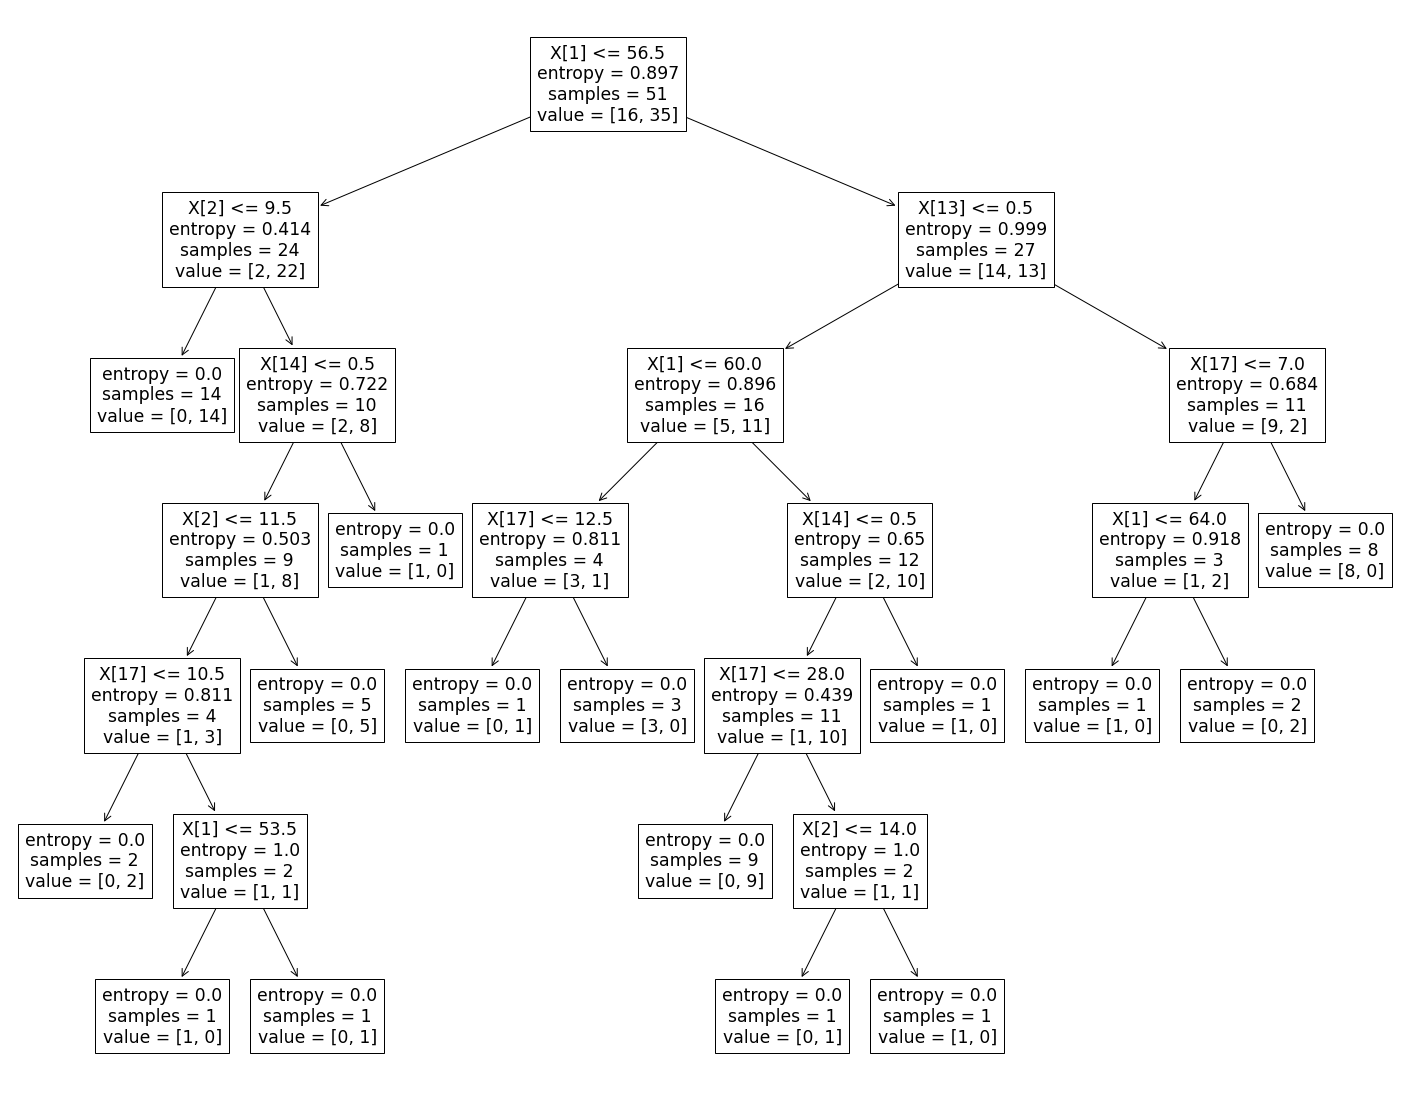

In [143]:
# visualize your tree 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

fig = plt.figure(figsize=(25,20))
tree.plot_tree(model)


In [149]:
X.columns

Index(['Gender', 'Age', 'Days from symptoms to hospital', 'No comorbidity',
       'Cardiovascular and\ncerebrovascular disease',
       'Endocrine system disease', 'Malignant tumor',
       'Respiratory system disease', 'Digestive system disease',
       'Renal disease', 'Liver disease', 'Fever', 'Cough', 'Chest tightness',
       'Fatigue', 'Diarrhea', 'Others', 'Hospital stay, days'],
      dtype='object')

In [175]:
Y

0     0
1     1
2     1
3     0
4     1
     ..
68    1
69    1
70    1
71    1
72    1
Name: Clinical classification, Length: 73, dtype: int32

C:\Users\Beyza\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


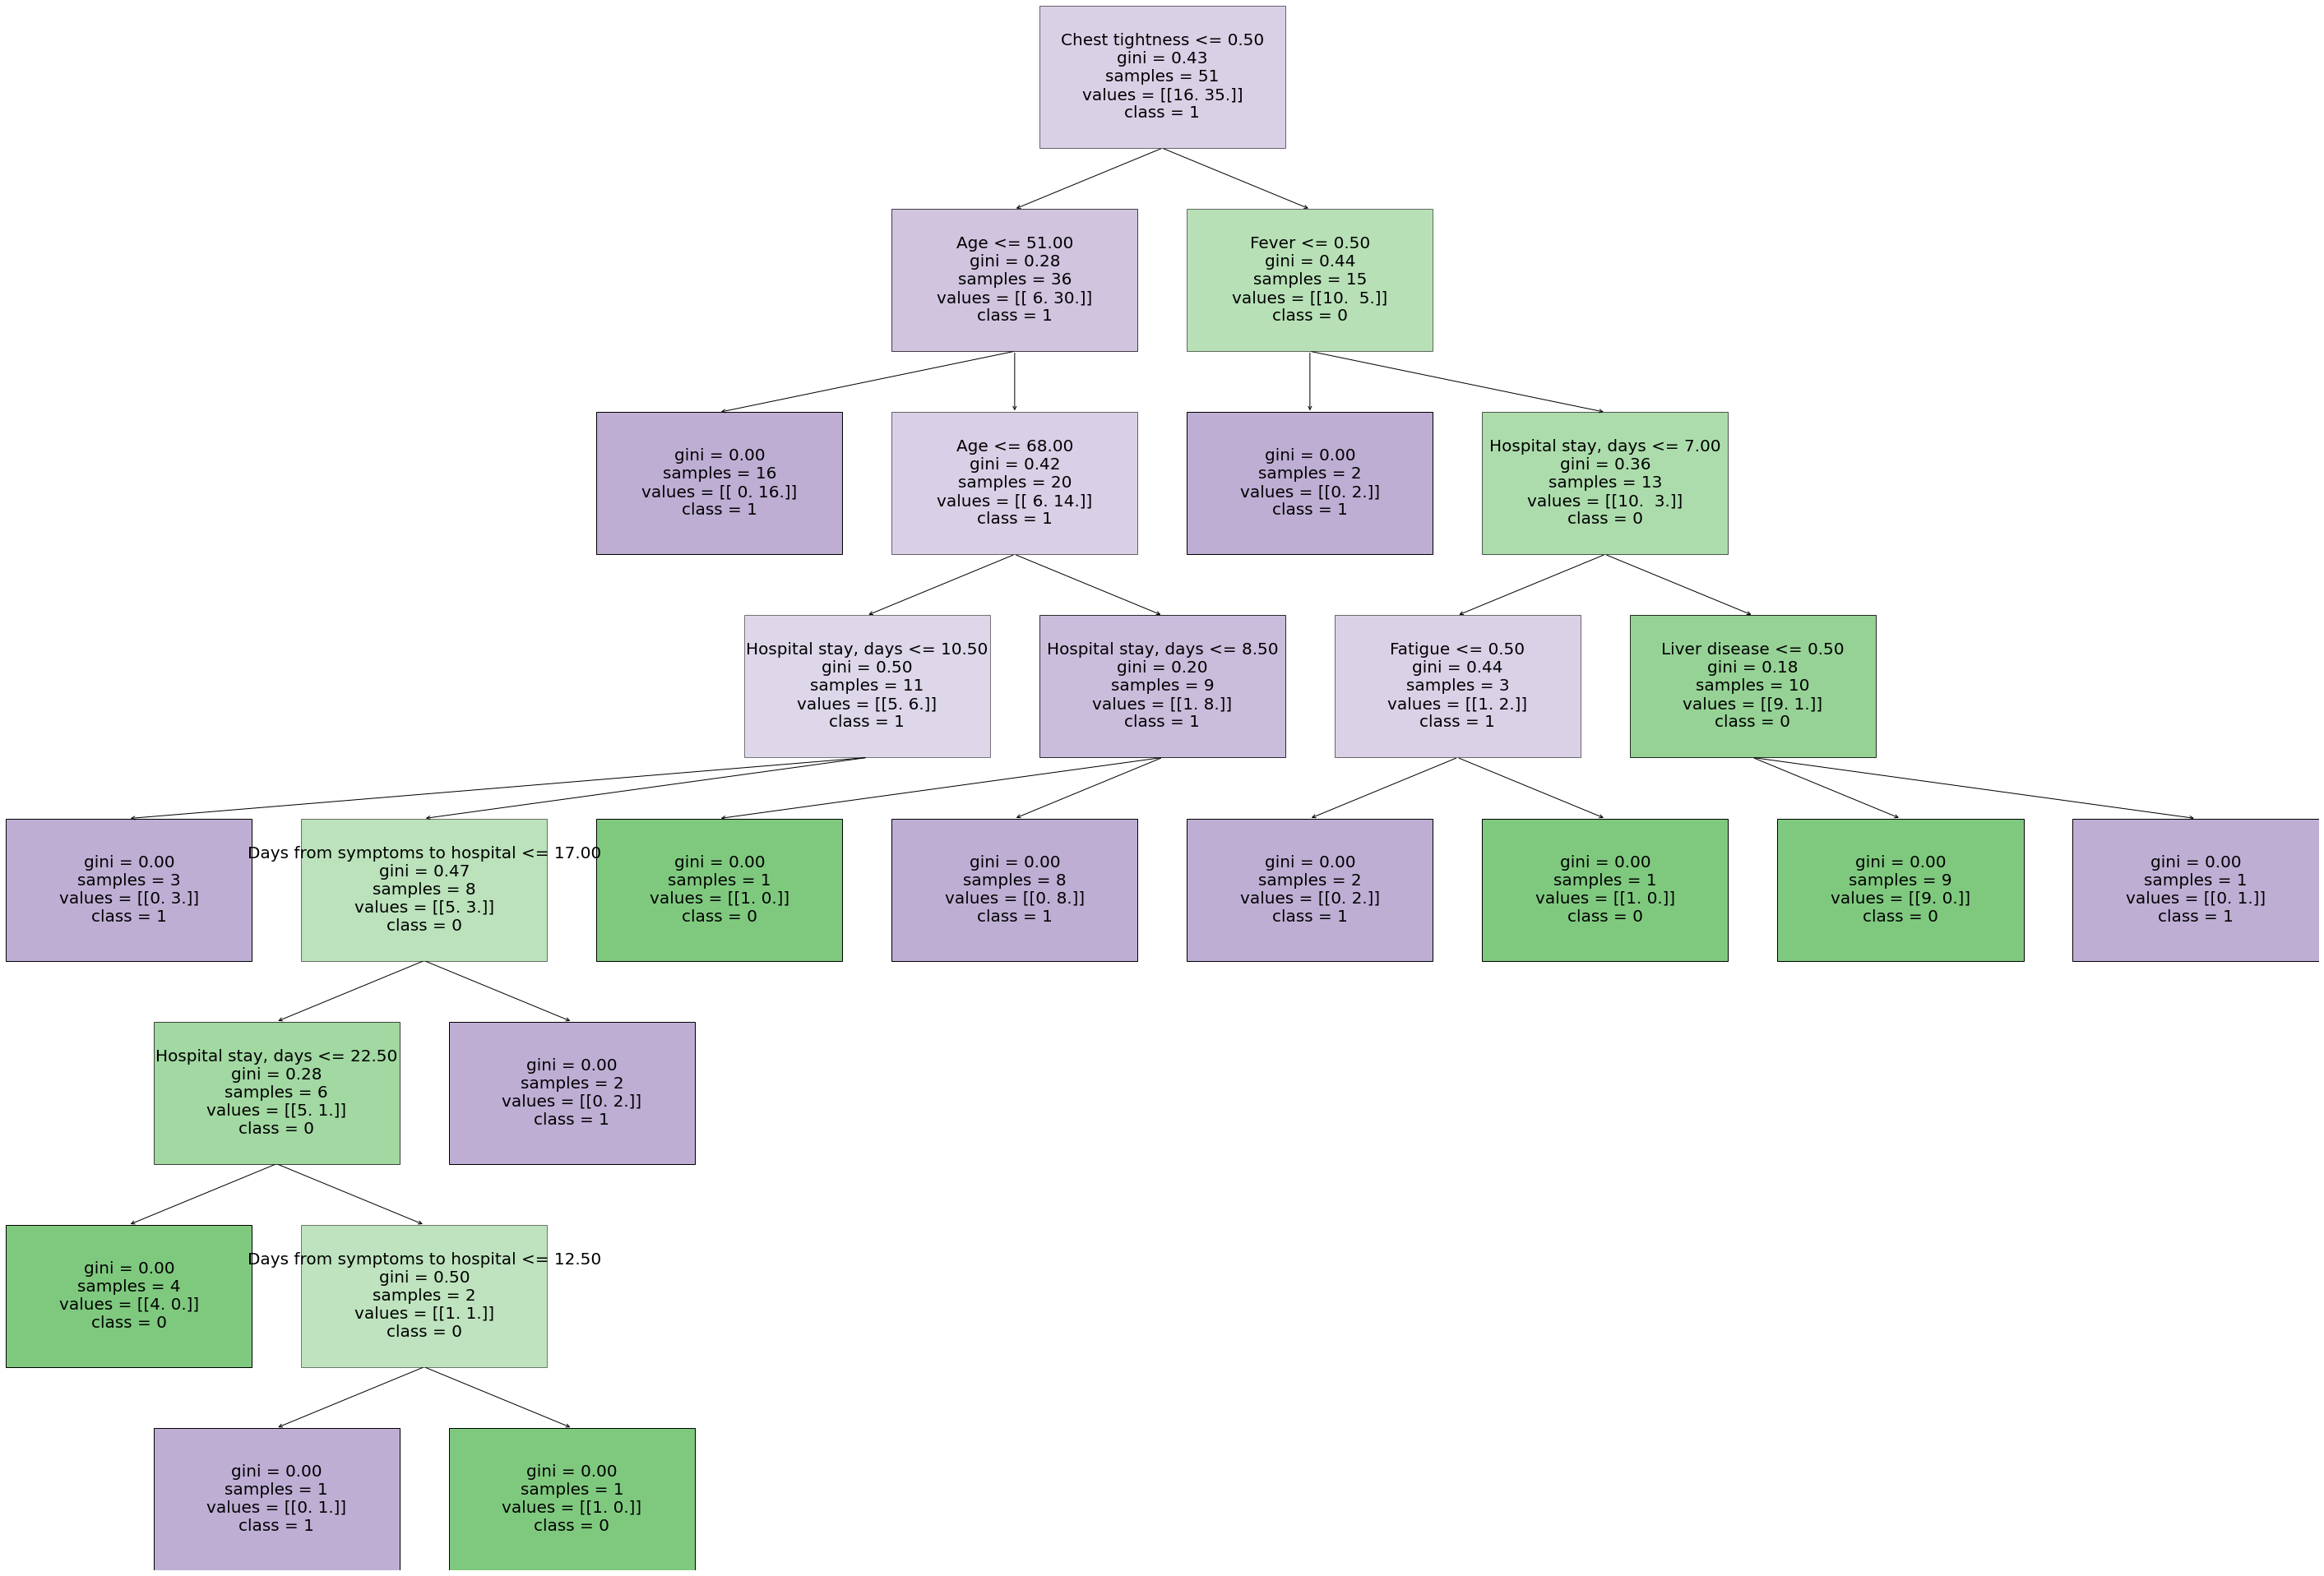

In [176]:
# !pip install dtreeplt
from dtreeplt import dtreeplt
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
dtree = dtreeplt(
    model = model,
    feature_names= X_train.columns,
    target_names= ['0','1']
)
fig = dtree.view()

#### KNN Classifier

In [154]:
# classify test data with KNN classifier of sklearn (for each possible k value)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred5 = knn.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred7 = knn.predict(X_test)

# calculate accuracy, error, recall, precision, sensitivity, specifity, f1 measure, confusion matrix  
#           based on your defined functions (using k=7)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred7)

from sklearn.metrics import classification_report

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

f1=2*((precision*recall)/(precision+recall))
print('f1 : {0:0.4f}'.format(f1))

# plot test errors for each k

Classification accuracy : 0.6818
Classification error : 0.3182
Precision : 0.5000
Recall or Sensitivity : 0.5714
Specificity : 0.7333
f1 : 0.5333


### Evaluation Part: Decision Boundries, ROC Curves, Performance Comparisons

In [70]:
!pip install scikit-learn

In [158]:
reduced_data = X_train[["Age","Hospital stay, days"]]

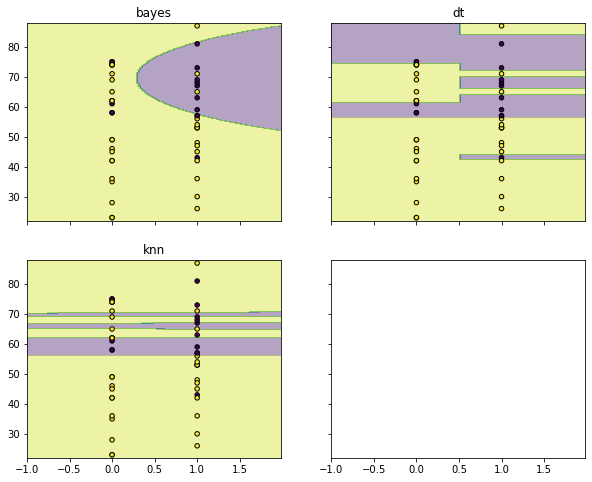

In [161]:
# show decision boundaries 
from itertools import product
import numpy as np
import pylab as pl

h=.02 # step size in the mesh

reduced_data = X_train.iloc[:, :2]

knn = KNeighborsClassifier(n_neighbors=7)
knn = knn.fit(reduced_data, y_train)

model=tree.DecisionTreeClassifier(criterion='entropy')
# train Decision Tree Classifier
model = model.fit(reduced_data, y_train)


gnb = GaussianNB()
# Train the model using the training set
gnb.fit(reduced_data, y_train)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data.iloc[:, 0].min() - 1, reduced_data.iloc[:, 0].max() + 1
y_min, y_max = reduced_data.iloc[:, 1].min() - 1, reduced_data.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(([0, 0], [0, 1],[1,0]),
                        [gnb, model, knn],
                        ['bayes', 'dt',
                         'knn']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], c=y_train, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()


Text(0.5, 0, 'False Positive Rate')

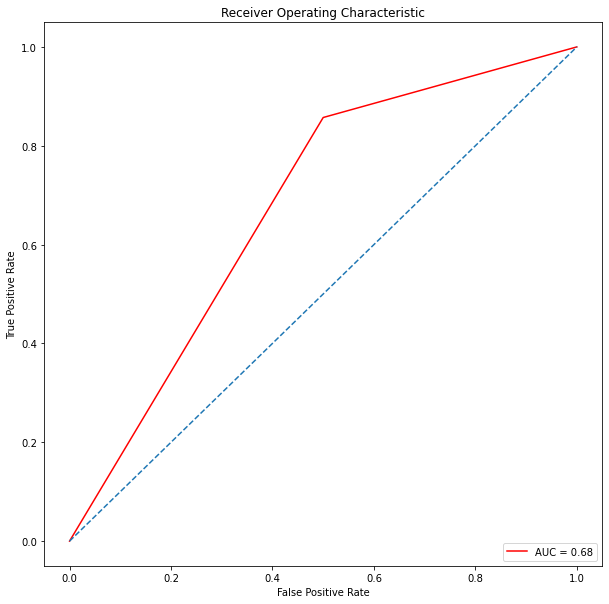

In [162]:
# draw ROC curves for each classifier
# roc curve and auc
from sklearn import metrics
#DT
confusion_matrix=metrics.confusion_matrix(y_test,predictions)
auc_roc=metrics.classification_report(y_test,predictions)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Text(0.5, 0, 'False Positive Rate')

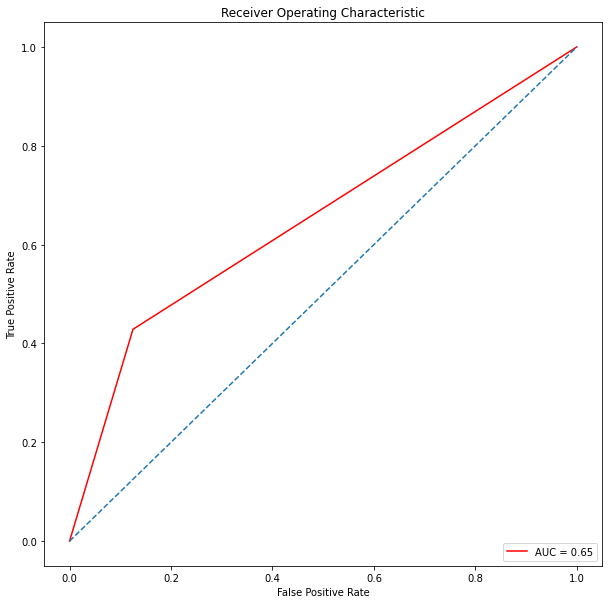

In [163]:
# Bayes
confusion_matrix=metrics.confusion_matrix(y_test,y_predB)
auc_roc=metrics.classification_report(y_test,y_predB)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predB)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

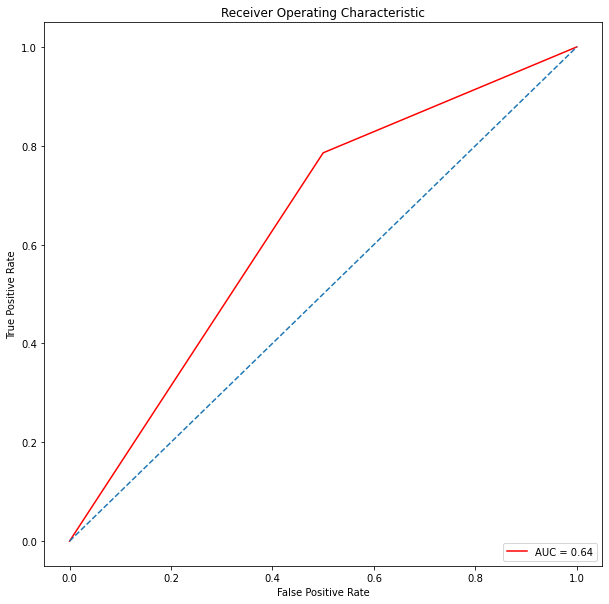

In [164]:
# KNN
confusion_matrix=metrics.confusion_matrix(y_test,y_pred7)
auc_roc=metrics.classification_report(y_test,y_pred7)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred7)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [167]:
# show classification results based on all measures (acc,err,recall, specifity, etc.) inside a table.

report_DT = metrics.classification_report(y_test, predictions)   
report_Bayes = metrics.classification_report(y_test, y_predB)
report_KNN = metrics.classification_report(y_test, y_pred7)
print("report_DT " +  "\n" + report_DT,"report_Bayes "  +  "\n" +  report_Bayes,"report_KNN "  +  "\n" +  report_KNN, sep = "\n")

report_DT 
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.75      0.86      0.80        14

    accuracy                           0.73        22
   macro avg       0.71      0.68      0.69        22
weighted avg       0.72      0.73      0.72        22

report_Bayes 
              precision    recall  f1-score   support

           0       0.47      0.88      0.61         8
           1       0.86      0.43      0.57        14

    accuracy                           0.59        22
   macro avg       0.66      0.65      0.59        22
weighted avg       0.72      0.59      0.58        22

report_KNN 
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.73      0.79      0.76        14

    accuracy                           0.68        22
   macro avg       0.65      0.64      0.65        22
weighted avg       0.67      0.68    